In [11]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
start=time.time()
def media(li):
    lo=[int(i) for i in li if i.isdigit()]
    return sum(lo)/len(lo)
li=[]
for i in range(1,50001):
    lo=f[i].split()
    a=lo[0:2]
    a.append(media(lo))
    li.append(a)
end=time.time()
end -start

7.727873802185059

In [10]:
f=open('ApplicantsInfo.txt').readlines()


In [40]:
li=[]
for i in range(1,50001):
    lo=f[i].split()
    a=lo[0:2]
    a.append(media(lo))
    li.append(a)
    

## First method

In [343]:
from tqdm import tqdm # prende l'i-esimo e controlla se quelli prima sono tutti maggiori, appena trova uno minore 
                      # lo cancella e sposta tutto
import time
lo=li
start=time.time()
for i in range(len(lo)):
        j=0
        while j<i and (lo[j][2]>=lo[i][2]):
            j+=1
        gino=lo[i]
        del lo[i]
        #lo.remove(gino)
        lo.insert(j,gino)  

for i in range(len(lo)-1):
    if lo[i][2]==lo[i+1][2] and lo[i][0]>lo[i+1][0]:
        a=lo[i+1][0]
        lo[i+1][0]=lo[i][0]
        lo[i][0]=a
end=time.time()


tempo1=end-start

In [344]:
tempo1

201.20450353622437

In [326]:
i=0
while lo[i][2]>=lo[i+1][2] and i<(len(lo)-2):  #CHECK
    i+=1
print(i)

49998


$\textbf{Time complexity}$

$$T(k)=\sum_{i=1}^k i= \frac{(k+1)k}{2}, \qquad T(k)=O(k^2)$$

$\textbf{Considering the worst case in which the while cicle do everytime i iterations}$

$\textbf{and neglecting the for cicle which order the students with the same mean, that have O(k) complexity.}$



## Second method

In [282]:
#li=[]
lo=li

In [345]:
from tqdm import tqdm   # calcola il maggiore da [i,fine] e lo mette all'i-esima posizione
start=time.time()
for i in range(len(lo)):
    M=0
    for j in range(i,len(lo)):
        if lo[j][2]>=M:
            M=lo[j][2]
            J=j
    lo.insert(i,lo[J])
    del lo[J+1]
            
for i in range(len(lo)-1):  # ordering of the students with the same mean is fast so i do that a part
    if lo[i][2]==lo[i+1][2] and lo[i][0]>lo[i+1][0]:
        a=lo[i+1][0]
        lo[i+1][0]=lo[i][0]
        lo[i][0]=a        
end=time.time()

tempo2=end-start



In [347]:
tempo2

310.57923793792725

In [315]:
i=0
while lo[i][2]>=lo[i+1][2] and i<49998:  #CHECK
    i+=1
print(i)

49998


$\textbf{Time complexity}$

$$T(k)=\sum_{i=1}^k k-i=\sum_{i=1}^k i= \frac{(k+1)k}{2}, \qquad T(k)=O(k^2)$$

$\textbf{Neglecting the for cicle which order the students with the same mean, that have O(k) complexity.}$



## Third method

In [352]:
j=0
start=time.time()
for j in range(1,len(lo)-2):
    lun=len(lo)-1-j
    for i in range(lun):
        if lo[i][2]<lo[i+1][2]:
            a=lo[i][2]
            lo[i][2]=lo[i+1][2]
            lo[i+2][2]=a
for i in range(len(lo)-1):  # ordering of the students with the same mean is fast so i do that a part
    if lo[i][2]==lo[i+1][2] and lo[i][0]>lo[i+1][0]:
        a=lo[i+1][0]
        lo[i+1][0]=lo[i][0]
        lo[i][0]=a    
end=time.time()

tempo3=end-start

In [353]:
tempo3

291.70587158203125

In [318]:
i=0
while lo[i][2]>=lo[i+1][2] and i<49998:
    i+=1
print(i)

49998


$\textbf{Time complexity}$

$$T(k)=\sum_{i=1}^k k-i=\sum_{i=1}^k i= \frac{(k+1)k}{2}, \qquad T(k)=O(k^2)$$

$\textbf{Neglecting the for cicle which order the students with the same mean, that have O(k) complexity.}$



## Evaluate the time taken for each of your implementations to answer the query stored in the ApplicantsInfo.txt file and visualize them.

In [354]:
nome=['first_method','second_method','third_method']

<AxesSubplot:>

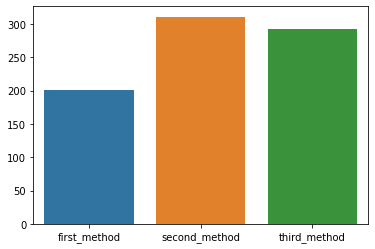

In [361]:
sns.barplot(x=nome,y=[tempo1,tempo2,tempo3])

## What is the most optimal algorithm, in your opinion, and why?

The best method is the first: the time complexity that we have calculated it's the same but in the first case we have considered the worst case. If we consider the case in which the list is already sorted the time complexity reduces to $O(k)$, while with the other methods it remains at $O(k^2)$.

## Implement a sorting algorithm using MapReduce and compare it against the three algorithms previously implemented using the ApplicantsInfo.txt file.

In [127]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [128]:
f=open('ApplicantsInfo.txt').readlines()


In [129]:
data=f[1:]
type(data)

list

In [130]:
def media(li):
    lo=list(map(int,li[2:]))
    return np.mean(lo)

def some(el):
    el=el.split()
    a=el[0:2]
    a.append(media(el))
    return a

In [131]:
import time
start=time.time()
data= list(map(some,data))
end=time.time()
end-start

7.183170557022095

In [132]:
data.sort(key= lambda x: x[2], reverse =True)

In [133]:

for i in range(len(data)-1):
    if data[i][2]==data[i+1][2] and data[i][0]>data[i+1][0]:
        a=data[i+1][0]
        data[i+1][0]=data[i][0]
        data[i][0]=a

In [134]:
data

[['Emily', 'Crispin', 24.492],
 ['Patricia', 'Witten', 24.489],
 ['Doreen', 'Richmond', 24.447],
 ['Bruce', 'Johnson', 24.445],
 ['David', 'Niederberger', 24.437],
 ['Keisha', 'Boston', 24.436],
 ['Steven', 'Keene', 24.436],
 ['Melody', 'Sanchez', 24.423],
 ['John', 'Johnson', 24.419],
 ['Marvin', 'Ramirez', 24.417],
 ['Joshua', 'Reece', 24.414],
 ['Luisa', 'Young', 24.411],
 ['Manuel', 'Sullinger', 24.41],
 ['Edith', 'Lehtonen', 24.407],
 ['Ida', 'Mccabe', 24.406],
 ['Betty', 'Kubiak', 24.404],
 ['Violet', 'Paulino', 24.4],
 ['Particia', 'Mirabal', 24.397],
 ['Cara', 'Salinas', 24.396],
 ['Mattie', 'Baird', 24.396],
 ['Kelsey', 'Parker', 24.395],
 ['Richard', 'Mcneill', 24.395],
 ['Kathleen', 'Whaley', 24.391],
 ['Latoya', 'Stemp', 24.39],
 ['Jeffrey', 'Johnson', 24.389],
 ['Amy', 'Wall', 24.388],
 ['Marie', 'Walker', 24.388],
 ['Harry', 'Lupu', 24.386],
 ['Josephine', 'Young', 24.385],
 ['Norma', 'Smith', 24.384],
 ['Mary', 'Nguyen', 24.383],
 ['Daryl', 'Singer', 24.382],
 ['Desiree'